### RideWise Customer Analytics Platform

#### Project Overview
#### RideWise is a leading European mobility technology company serving over 200,000 customers and powering more than 800,000 monthly trips across major cities. Operating in a highly competitive and fast-paced mobility sector, the company is experiencing high customer churn and lacks real-time behavioral insights.
#### This project focuses on building a robust customer analytics platform that enables customer segmentation and churn prediction to drive proactive retention strategies across key European markets.

#### Business Problem
##### * RideWise currently faces several operational and strategic challenges:
##### * High churn rate: 25% quarterly churn impacting revenue.
##### * Limited customer insight: No real-time understanding of behavior.
##### * Inefficient marketing: Poor targeting leads to wasted spend.
##### * Reactive decision-making: No early detection of at-risk users.
##### * Slow analytics: Manual processes delay critical insights.

#### Desired Future State
##### * The goal is to transition RideWise into a data-driven, proactive organization by:
##### * Identifying at-risk customers before they churn.
##### * Creating meaningful customer segments.
##### * Delivering real-time insights for faster decisions.
##### * Optimizing marketing campaigns and spend.
##### * Strengthening competitive positioning.


#### Import Libraries


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

#### Load dataset 'riders' and 'trips'

In [2]:
# Load dataset
riders = pd.read_csv("Ridewise -Project 1/riders.csv")
trips = pd.read_csv("Ridewise -Project 1/trips.csv")

#### Explore Dataset



In [3]:
# Print top rows -'riders'
riders.head(10)

,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob,referred_by
0,R00000,24-01-25,Bronze,34.729629,Nairobi,5.0,0.142431,R00001
1,R00001,09-09-24,Bronze,34.571020,Nairobi,4.7,0.674161,NaN
2,R00002,07-09-24,Bronze,47.133960,Lagos,4.2,0.510379,NaN
3,R00003,17-03-25,Bronze,41.658628,Nairobi,4.9,0.244779,NaN
4,R00004,20-08-24,Silver,40.681709,Lagos,3.9,0.269960,R00002
5,R00005,10-07-23,Bronze,40.419152,Lagos,5.0,0.327452,NaN
6,R00006,17-08-23,Gold,44.005281,Lagos,4.4,0.120452,R00000
7,R00007,13-05-23,Bronze,27.241087,Nairobi,4.9,0.284246,NaN
8,R00008,02-04-25,Bronze,29.560168,Nairobi,5.0,0.039879,R00007
9,R00009,01-07-23,Bronze,23.950515,Lagos,4.6,0.224872,NaN


In [4]:
# Print top rows 'trips'
trips.head(10)

,trip_id,user_id,driver_id,fare,surge_multiplier,tip,payment_type,pickup_time,dropoff_time,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,weather,city,loyalty_status
0,T000000,R05207,D00315,12.11,1.0,0.00,Card,2024-11-27 18:41:50+02:27,2024-11-27 19:33:50+02:27,-1.108123,36.912209,-1.068155,36.875377,Foggy,Nairobi,Bronze
1,T000001,R09453,D03717,8.73,1.0,0.02,Card,2024-10-28 23:13:48+00:14,2024-10-28 23:26:48+00:14,6.675266,3.515740,6.641734,3.525620,Sunny,Lagos,Gold
2,T000002,R00567,D02035,19.68,1.0,0.00,Card,2025-02-17 05:36:41+02:27,2025-02-17 05:52:41+02:27,-1.248589,37.010668,-1.273182,37.018586,Cloudy,Nairobi,Bronze
3,T000003,R09573,D02657,16.43,1.0,0.01,Mobile Money,2024-06-18 19:27:14+02:05,2024-06-18 19:32:14+02:05,29.819554,31.188780,29.837689,31.232978,Cloudy,Cairo,Bronze
4,T000004,R03446,D01026,8.70,1.0,1.06,Card,2024-10-05 09:58:16+02:27,2024-10-05 10:28:16+02:27,-1.676479,36.729219,-1.638395,36.694063,Sunny,Nairobi,Gold
5,T000005,R05852,D04849,16.98,1.4,0.52,Mobile Money,2024-07-02 18:20:12+02:27,2024-07-02 18:52:12+02:27,-1.370880,37.041389,-1.410399,37.045473,Rainy,Nairobi,Silver
6,T000006,R05611,D04686,17.49,1.4,0.00,Card,2024-10-19 07:17:45+02:05,2024-10-19 07:49:45+02:05,29.908624,31.099617,29.886305,31.127414,Rainy,Cairo,Silver
7,T000007,R04890,D02006,25.62,1.7,0.00,Mobile Money,2024-12-06 17:23:11+02:27,2024-12-06 18:06:11+02:27,-1.153775,36.358126,-1.134236,36.392381,Rainy,Nairobi,Gold
8,T000008,R04341,D03835,14.97,1.0,0.00,Card,2024-09-15 20:25:57+00:14,2024-09-15 20:30:57+00:14,6.695755,3.409177,6.679148,3.396333,Sunny,Lagos,Silver
9,T000009,R09904,D03494,12.15,1.3,0.11,Mobile Money,2025-03-19 08:53:00+02:05,2025-03-19 09:03:00+02:05,29.846699,31.279564,29.852363,31.260849,Sunny,Cairo,Silver


In [5]:
# Print botom rows -'riders'
riders.tail(10)

,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob,referred_by
9990,R09990,03-08-23,Platinum,32.366359,Nairobi,4.9,0.300597,R09768
9991,R09991,03-05-24,Silver,26.151489,Cairo,3.9,0.334246,NaN
9992,R09992,21-10-23,Bronze,52.601774,Cairo,4.7,0.143734,NaN
9993,R09993,29-01-24,Silver,33.558934,Nairobi,4.7,0.185276,NaN
9994,R09994,31-05-24,Bronze,35.751333,Lagos,5.0,0.338363,NaN
9995,R09995,26-04-25,Silver,20.688176,Lagos,4.4,0.028371,NaN
9996,R09996,26-07-23,Silver,18.000000,Cairo,4.1,0.290365,NaN
9997,R09997,18-04-25,Bronze,34.197784,Lagos,4.7,0.013147,R02155
9998,R09998,10-01-24,Bronze,51.705319,Cairo,3.8,0.253959,R07447
9999,R09999,29-03-25,Gold,36.089597,Nairobi,3.9,0.401529,NaN


In [6]:
# Print botom rows 'trips'
trips.tail(10)

,trip_id,user_id,driver_id,fare,surge_multiplier,tip,payment_type,pickup_time,dropoff_time,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,weather,city,loyalty_status
199990,T199990,R00705,D03122,8.59,1.0,0.00,Card,2024-11-13 17:17:57+02:05,2024-11-13 18:10:57+02:05,30.237674,31.206882,30.265869,31.169655,Sunny,Cairo,Bronze
199991,T199991,R00810,D03011,19.65,1.0,3.26,Cash,2024-06-13 23:14:54+02:27,2024-06-13 23:23:54+02:27,-1.234208,36.757649,-1.259120,36.768658,Sunny,Nairobi,Bronze
199992,T199992,R02796,D02559,17.47,1.0,2.46,Cash,2025-01-04 06:16:29+02:27,2025-01-04 06:44:29+02:27,-1.238916,36.686793,-1.280580,36.734024,Sunny,Nairobi,Bronze
199993,T199993,R09831,D02825,18.14,1.0,0.80,Mobile Money,2025-04-06 10:03:22+00:14,2025-04-06 10:18:22+00:14,6.440663,3.533893,6.468872,3.566908,Sunny,Lagos,Silver
199994,T199994,R09903,D01628,8.19,1.0,0.26,Card,2024-05-29 18:44:26+02:27,2024-05-29 19:31:26+02:27,-1.208844,36.876605,-1.192507,36.877234,Sunny,Nairobi,Bronze
199995,T199995,R08022,D04562,26.79,1.3,0.00,Card,2025-03-14 18:16:26+00:14,2025-03-14 18:27:26+00:14,6.511389,3.297189,6.545565,3.327685,Cloudy,Lagos,Silver
199996,T199996,R05421,D03984,14.65,1.0,0.00,Card,2024-07-02 06:59:36+00:14,2024-07-02 07:36:36+00:14,6.489143,3.492786,6.453581,3.514289,Sunny,Lagos,Bronze
199997,T199997,R06619,D01173,12.87,1.2,0.00,Mobile Money,2024-05-06 20:38:57+00:14,2024-05-06 21:25:57+00:14,6.459348,3.527623,6.451930,3.521616,Rainy,Lagos,Bronze
199998,T199998,R02867,D00974,17.18,1.3,0.00,Mobile Money,2024-09-25 03:11:33+00:14,2024-09-25 03:45:33+00:14,6.540074,3.471683,6.540339,3.426481,Rainy,Lagos,Gold
199999,T199999,R07749,D04894,13.47,1.0,0.00,Card,2024-05-24 18:19:39+02:05,2024-05-24 18:51:39+02:05,30.234277,30.884004,30.279227,30.874865,Sunny,Cairo,Bronze


#### Dimesionality of Dataset


In [7]:
# Check no of rows and coulumns
riders.shape

(10000, 8)

In [8]:
trips.shape

(200000, 16)

In [9]:
# Examine column features ( feature engineering)

riders.columns

Index(['user_id', 'signup_date', 'loyalty_status', 'age', 'city',
       'avg_rating_given', 'churn_prob', 'referred_by'],
      dtype='object')

In [10]:
trips.columns

Index(['trip_id', 'user_id', 'driver_id', 'fare', 'surge_multiplier', 'tip',
       'payment_type', 'pickup_time', 'dropoff_time', 'pickup_lat',
       'pickup_lng', 'dropoff_lat', 'dropoff_lng', 'weather', 'city',
       'loyalty_status'],
      dtype='object')

In [11]:
# Invstigate 'riders' dataset for anomalies
riders.info

<bound method DataFrame.info of      user_id signup_date loyalty_status        age     city  avg_rating_given  \
0     R00000    24-01-25         Bronze  34.729629  Nairobi               5.0   
1     R00001    09-09-24         Bronze  34.571020  Nairobi               4.7   
2     R00002    07-09-24         Bronze  47.133960    Lagos               4.2   
3     R00003    17-03-25         Bronze  41.658628  Nairobi               4.9   
4     R00004    20-08-24         Silver  40.681709    Lagos               3.9   
...      ...         ...            ...        ...      ...               ...   
9995  R09995    26-04-25         Silver  20.688176    Lagos               4.4   
9996  R09996    26-07-23         Silver  18.000000    Cairo               4.1   
9997  R09997    18-04-25         Bronze  34.197784    Lagos               4.7   
9998  R09998    10-01-24         Bronze  51.705319    Cairo               3.8   
9999  R09999    29-03-25           Gold  36.089597  Nairobi               3.9

In [12]:
# Investigate 'trips'dataset for anomalies
trips.info

<bound method DataFrame.info of         trip_id user_id driver_id   fare  surge_multiplier   tip  \
0       T000000  R05207    D00315  12.11               1.0  0.00   
1       T000001  R09453    D03717   8.73               1.0  0.02   
2       T000002  R00567    D02035  19.68               1.0  0.00   
3       T000003  R09573    D02657  16.43               1.0  0.01   
4       T000004  R03446    D01026   8.70               1.0  1.06   
...         ...     ...       ...    ...               ...   ...   
199995  T199995  R08022    D04562  26.79               1.3  0.00   
199996  T199996  R05421    D03984  14.65               1.0  0.00   
199997  T199997  R06619    D01173  12.87               1.2  0.00   
199998  T199998  R02867    D00974  17.18               1.3  0.00   
199999  T199999  R07749    D04894  13.47               1.0  0.00   

        payment_type                pickup_time               dropoff_time  \
0               Card  2024-11-27 18:41:50+02:27  2024-11-27 19:33:50+02:2

#### Data Cleaning
##### -Convert Date Columns

In [42]:
# Convert date columns to datetime
riders['signup_date'] = pd.to_datetime(
    riders['signup_date'],
    errors='coerce')

trips['pickup_time'] = pd.to_datetime(
    trips['pickup_time'],
    utc=True,
    errors='coerce')

trips['dropoff_time'] = pd.to_datetime(
    trips['dropoff_time'],
    utc=True,
    errors='coerce')


In [14]:
riders[['signup_date']].head()

,signup_date
0,2025-01-24
1,2024-09-09
2,2024-07-09
3,2025-03-17
4,2024-08-20


In [15]:
trips[['pickup_time', 'dropoff_time']].head()

,pickup_time,dropoff_time
0,2024-11-27 16:14:50+00:00,2024-11-27 17:06:50+00:00
1,2024-10-28 22:59:48+00:00,2024-10-28 23:12:48+00:00
2,2025-02-17 03:09:41+00:00,2025-02-17 03:25:41+00:00
3,2024-06-18 17:22:14+00:00,2024-06-18 17:27:14+00:00
4,2024-10-05 07:31:16+00:00,2024-10-05 08:01:16+00:00


In [16]:
riders.dtypes

user_id                     object
signup_date         datetime64[ns]
loyalty_status              object
age                        float64
city                        object
avg_rating_given           float64
churn_prob                 float64
referred_by                 object
dtype: object

#### Check Missing Values


In [17]:
# Missing values in riders (there are 69.5% missing values in 'reffered by' )
riders.isnull().sum()

user_id                0
signup_date            0
loyalty_status         0
age                    0
city                   0
avg_rating_given       0
churn_prob             0
referred_by         6947
dtype: int64

In [18]:
riders.isnull().mean()*100

user_id              0.00
signup_date          0.00
loyalty_status       0.00
age                  0.00
city                 0.00
avg_rating_given     0.00
churn_prob           0.00
referred_by         69.47
dtype: float64

In [19]:
# Missing values in trips (No missing value in trips)
trips.isnull().sum()

trip_id             0
user_id             0
driver_id           0
fare                0
surge_multiplier    0
tip                 0
payment_type        0
pickup_time         0
dropoff_time        0
pickup_lat          0
pickup_lng          0
dropoff_lat         0
dropoff_lng         0
weather             0
city                0
loyalty_status      0
dtype: int64

#### Handling Missing Values
##### The `referred_by`column contained approximately 69.5% missing values.  
##### Since the column is not critical for churn prediction or customer segmentation, it was droped to improve data quality and simplify the modeling process.

In [20]:
# Drop the referred_by column
riders = riders.drop(columns=['referred_by'])

In [21]:
riders.columns # confirm that it has been dropped

Index(['user_id', 'signup_date', 'loyalty_status', 'age', 'city',
       'avg_rating_given', 'churn_prob'],
      dtype='object')

#### Descriptive Statistics

In [22]:
# Riders stats(numerical)
riders.describe()

,signup_date,age,avg_rating_given,churn_prob
count,10000,10000.000000,10000.000000,10000.000000
mean,2024-04-27 03:42:37.439999744,35.154221,4.461510,0.286168
min,2023-01-05 00:00:00,18.000000,2.600000,0.002934
25%,2023-10-20 00:00:00,28.317568,4.200000,0.161691
50%,2024-04-25 00:00:00,35.037671,4.500000,0.266712
75%,2024-10-30 00:00:00,41.691186,4.800000,0.388812
max,2025-12-04 00:00:00,70.000000,5.000000,0.913302
std,NaN,9.545528,0.429162,0.159029


In [23]:
# riders categorical stats
riders.describe(include =["object","bool"])

,user_id,loyalty_status,city
count,10000,10000,10000
unique,10000,4,3
top,R00000,Bronze,Cairo
freq,1,6057,3374


In [24]:
# Trips stats(numerical)
trips.describe()

,fare,surge_multiplier,tip,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,15.401285,1.141499,0.469566,11.849600,23.924133,11.849589,23.924173
std,6.163199,0.255362,1.100545,13.362151,14.577572,13.362229,14.577642
min,2.970000,1.000000,0.000000,-1.786360,2.879224,-1.833220,2.830979
25%,11.000000,1.000000,0.000000,-1.172683,3.496574,-1.172868,3.497195
50%,14.130000,1.000000,0.000000,6.525574,31.238814,6.525235,31.239118
75%,18.350000,1.200000,0.400000,29.934766,36.703772,29.935056,36.704067
max,82.740000,3.800000,21.860000,30.544251,37.317090,30.592457,37.364817


In [25]:
# trips stats (categorical)
trips.describe(include =["object","bool"])

,trip_id,user_id,driver_id,payment_type,weather,city,loyalty_status
count,200000,200000,200000,200000,200000,200000,200000
unique,200000,10000,5000,3,4,3,4
top,T000000,R08152,D03093,Card,Sunny,Cairo,Bronze
freq,1,42,67,100326,120151,67436,121252


#### Merge Riders and Trips

##### Merge riders and trips using user_id, which exists in both datasets.

In [26]:
# Merge datasets
data = pd.merge(trips, riders, on='user_id', how='left')

In [27]:
data.head(3)
# confirm it is has merged

,trip_id,user_id,driver_id,fare,surge_multiplier,tip,payment_type,pickup_time,dropoff_time,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,weather,city_x,loyalty_status_x,signup_date,loyalty_status_y,age,city_y,avg_rating_given,churn_prob
0,T000000,R05207,D00315,12.11,1.0,0.00,Card,2024-11-27 16:14:50+00:00,2024-11-27 17:06:50+00:00,-1.108123,36.912209,-1.068155,36.875377,Foggy,Nairobi,Bronze,2023-09-20,Bronze,37.629694,Nairobi,4.3,0.294348
1,T000001,R09453,D03717,8.73,1.0,0.02,Card,2024-10-28 22:59:48+00:00,2024-10-28 23:12:48+00:00,6.675266,3.515740,6.641734,3.525620,Sunny,Lagos,Gold,2024-08-30,Gold,37.051088,Lagos,4.7,0.105990
2,T000002,R00567,D02035,19.68,1.0,0.00,Card,2025-02-17 03:09:41+00:00,2025-02-17 03:25:41+00:00,-1.248589,37.010668,-1.273182,37.018586,Cloudy,Nairobi,Bronze,2023-03-12,Bronze,44.708377,Nairobi,3.8,0.169081


In [28]:
# Check merged shape
data.shape

(200000, 22)

### Outlier Detection Using Boxplots

In [37]:
# Select numerical columns
num_cols = ['age', 'avg_rating_given', 'churn_prob',
            'fare', 'surge_multiplier', 'tip']

#### Boxplots for Outlier Detection

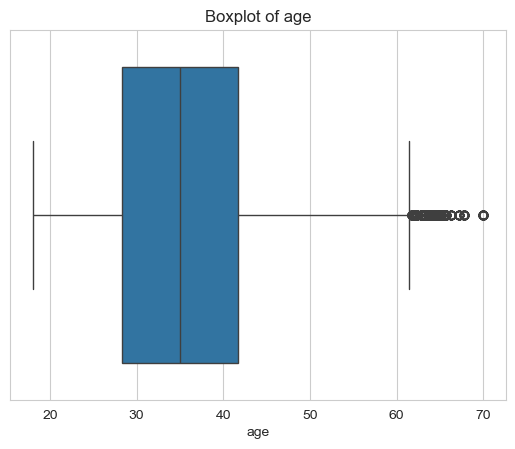

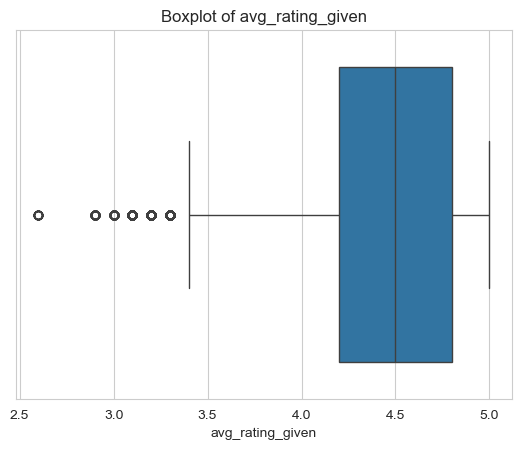

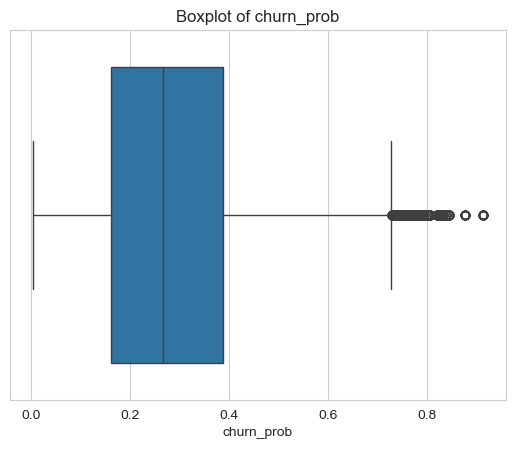

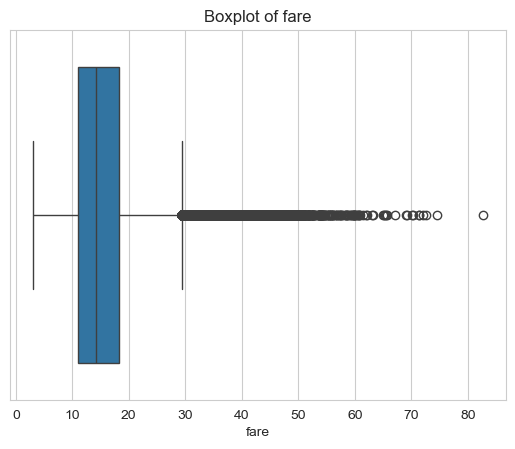

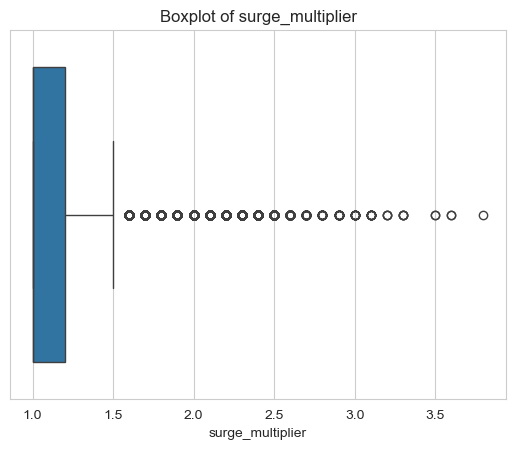

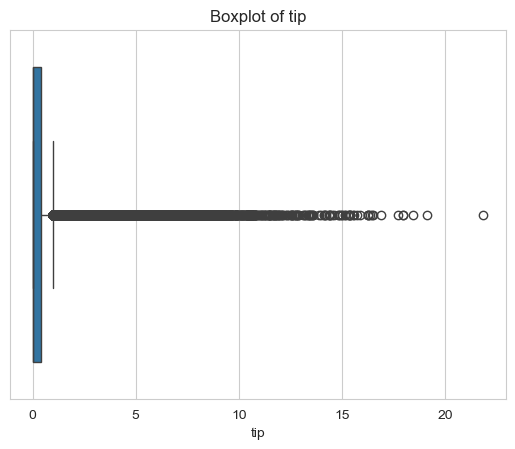

In [38]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#### IQR-Based Outlier Count

In [39]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers)

for col in num_cols:
    print(f"{col}: {count_outliers(data, col)} outliers")

age: 760 outliers
avg_rating_given: 1432 outliers
churn_prob: 1466 outliers
fare: 6570 outliers
surge_multiplier: 18023 outliers
tip: 31462 outliers


### Outlier Treatment Decision

##### Outlier detection using the IQR method revealed extreme values across several numerical features such as fare, surge multiplier, and tip.

##### However, in ride-hailing data, such extreme values often represent genuine customer behavior, such as long-distance trips, peak-hour surge pricing, or unusually high tips.

##### Therefore, no outliers were removed at this stage. Outlier handling will be addressed during the modeling phase if required, especially for algorithms sensitive to extreme values.

In [41]:
# Check age stats to flag unrealistic ages
riders['age'].describe()

count    10000.000000
mean        35.154221
std          9.545528
min         18.000000
25%         28.317568
50%         35.037671
75%         41.691186
max         70.000000
Name: age, dtype: float64

#### Age Outlier Assessment

##### Although the IQR method flagged some age values as outliers, further inspection showed that the age range is between 18 and 70 years. This range is realistic for a ride-hailing customer base.

##### Therefore, these values are not considered true outliers, and no records were removed.

### Trip Behavior Analysis

#### Distribution of Fare

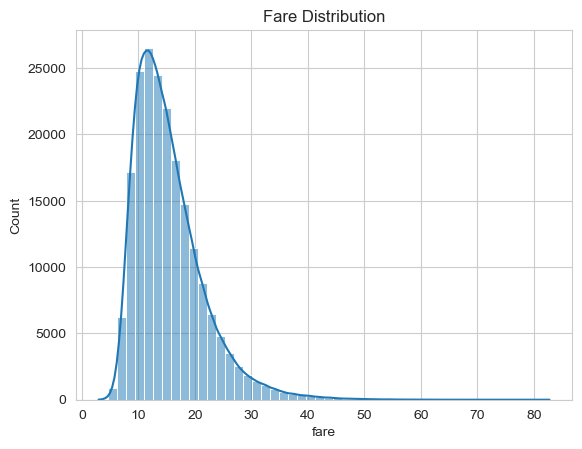

In [29]:
plt.figure()
sns.histplot(data['fare'], bins=50, kde=True)
plt.title("Fare Distribution")
plt.show()

#### Trips by Weather

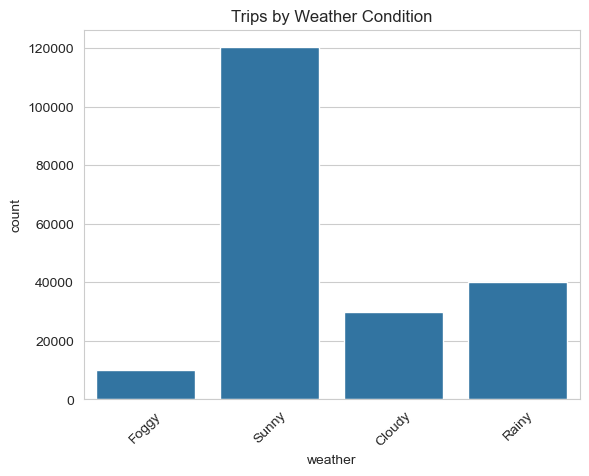

In [30]:
plt.figure()
sns.countplot(x='weather', data=data)
plt.title("Trips by Weather Condition")
plt.xticks(rotation=45)
plt.show()

#### Payment Type Distribution

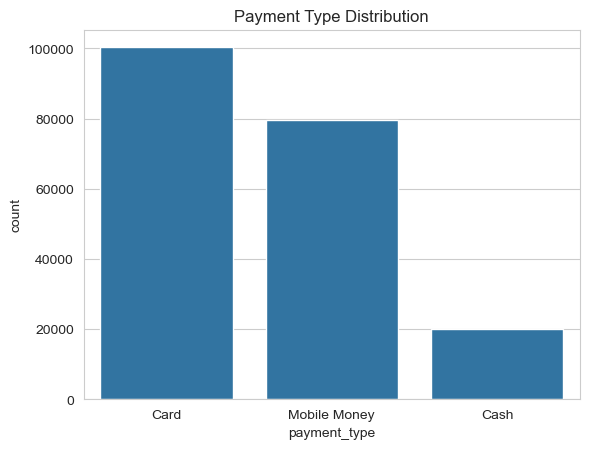

In [31]:
plt.figure()
sns.countplot(x='payment_type', data=data)
plt.title("Payment Type Distribution")
plt.show()

### Customer Activity Analysis

#### Trips per User

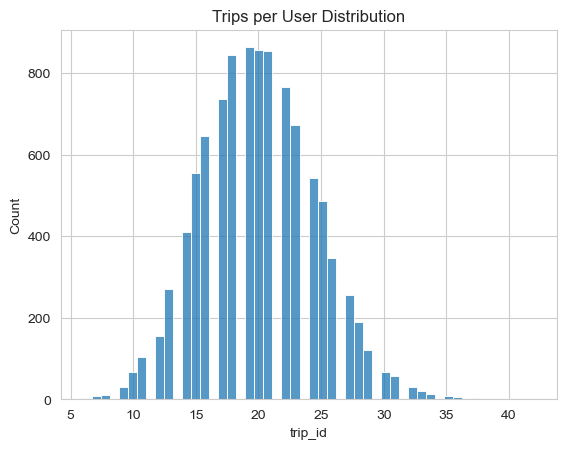

In [32]:
trips_per_user = data.groupby('user_id')['trip_id'].count()

plt.figure()
sns.histplot(trips_per_user, bins=50)
plt.title("Trips per User Distribution")
plt.show()

#### Age Distribution

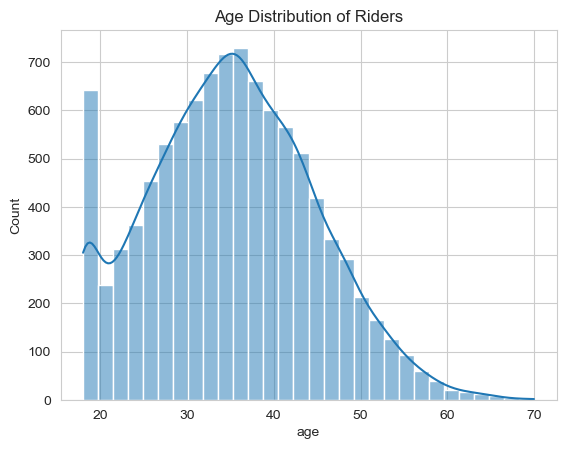

In [33]:
plt.figure()
sns.histplot(riders['age'], bins=30, kde=True)
plt.title("Age Distribution of Riders")
plt.show()

#### Loyalty Status Distribution

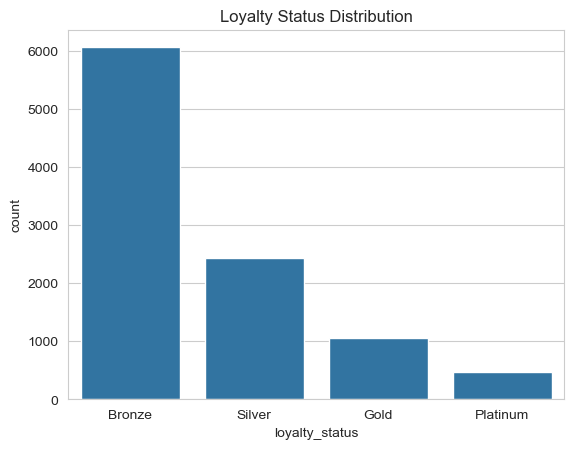

In [34]:
plt.figure()
sns.countplot(x='loyalty_status', data=riders)
plt.title("Loyalty Status Distribution")
plt.show()

### Churn Probability Analysis

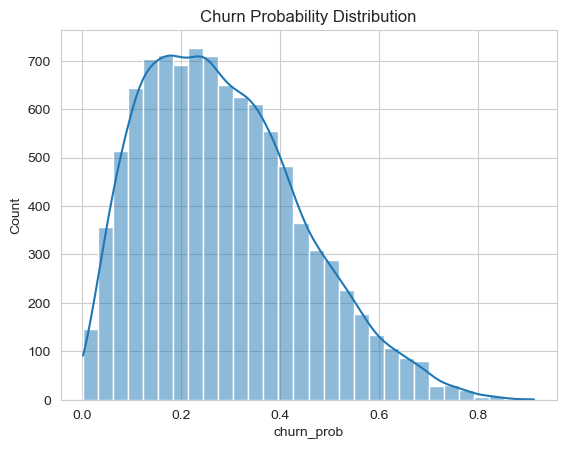

In [35]:
plt.figure()
sns.histplot(riders['churn_prob'], bins=30, kde=True)
plt.title("Churn Probability Distribution")
plt.show()

### Average Fare by Loyalty Status

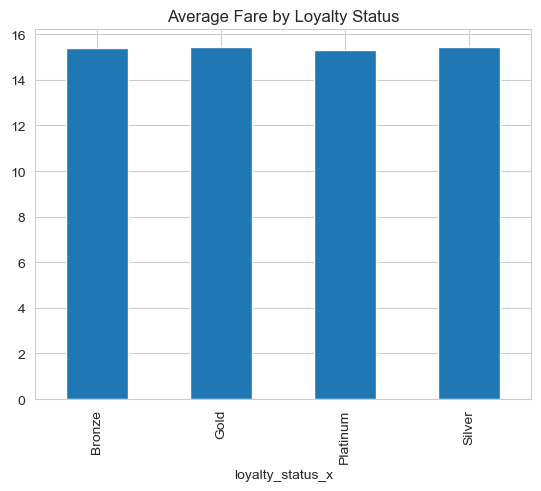

In [36]:
avg_fare_loyalty = data.groupby('loyalty_status_x')['fare'].mean()

avg_fare_loyalty.plot(kind='bar', title='Average Fare by Loyalty Status')
plt.show()


### EDA Insight Summary

#### Key EDA Insights

##### 1. The majority of riders fall within the 20–40 age bracket, indicating that the platform is most popular among young and middle-aged urban users.

##### 2. Trip activity is highly skewed, with a relatively small group of users accounting for a large share of total trips, suggesting the presence of high-value or power users.

##### 3. Digital payment methods dominate overall transactions, indicating strong adoption of cashless mobility services.

##### 4. Riders with higher loyalty status tend to generate higher average fares, suggesting a positive relationship between loyalty and customer value.

##### 5. Churn probability appears to be higher among low-activity or infrequent users, indicating that engagement level is a key predictor of retention.

##### 6. Extreme values observed in fare, tip, and surge multiplier are likely due to long-distance trips, peak-hour pricing, or premium usage, rather than data errors.